<a href="https://colab.research.google.com/github/deniseiras/Artificial-Intelligence/blob/main/DENIS_Trabalho_7_CNN_Aprendizado_Profundo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Uso de Rede Convolucional na classificação de extração e não extração de árvores na Floresta Amazônica.**

Prof. Elcio Hideiti Shiguemori

13/10/2021

---

Este Notebook pode ser acesso em: https://colab.research.google.com/drive/11ux7DGCFOTy1KBq9PwZoKhlkv245rJ3_?usp=sharing

---

**Criação de um conjunto de testes de parâmetros**

**Grupo**
 - Daniel Merli Lamosa
 - Denis Magalhaes De Almeida Eiras
 - Luiz Gustavo Miranda Pinto



In [ ]:
#!/usr/bin/python

import numpy as np
import pandas as pd
import cv2
import os, sys
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils.vis_utils import plot_model
!pip install split-folders
import splitfolders


In [ ]:
!gdown --id 16qpj4czPFN4GXfTsbNH7hNYMz2LjLmf3

Downloading...
From: https://drive.google.com/uc?id=16qpj4czPFN4GXfTsbNH7hNYMz2LjLmf3
To: /content/covmingrad.rar
100% 2.58M/2.58M [00:00<00:00, 80.6MB/s]


In [ ]:
!unrar x "/content/covmingrad.rar" "/content/sample_data/treinamento/"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/covmingrad.rar

Creating    /content/sample_data/treinamento                          OK
Creating    /content/sample_data/treinamento/non-logging              OK
Extracting  /content/sample_data/treinamento/non-logging/_Id_100000.tif       0%  OK 
Extracting  /content/sample_data/treinamento/non-logging/_Id_100001.tif       0%  OK 
Extracting  /content/sample_data/treinamento/non-logging/_Id_100003.tif       0%  OK 
Extracting  /content/sample_data/treinamento/non-logging/_Id_100011.tif       0%  OK 
Extracting  /content/sample_data/treinamento/non-logging/_Id_100012.tif       0%  OK 
Extracting  /content/sample_data/treinamento/non-logging/_Id_100013.tif       0%  OK 
Extracting  /content/sample_data/treinamento/non-logging/_Id_100014.tif       0%  OK 
Extracting  /content/sample_data/treinamento/non-logging/_Id_100015.tif     

In [ ]:
path = "/content/sample_data/treinamento/non-logging/"
dirs = os.listdir( path )

os.system('mkdir \"/content/sample_data/treinamento/non-logging-resized/\"')
path2 = "/content/sample_data/treinamento/non-logging-resized/"
dirs2 = os.listdir( path2 )

def resize():
    for item in dirs:
        if os.path.isfile(path+item):
            im = Image.open(path+item)
            f, e = os.path.splitext(path2+item)
            imResize = im.resize((50,50), Image.ANTIALIAS)
            imResize.save(f + ' resized.tiff', 'tiff', quality=90)

resize()

In [ ]:
os.system('rm -f \"/content/sample_data/treinamento/selective-logging/extrac_Id_1112.tif.aux.xml\"')

path = "/content/sample_data/treinamento/selective-logging/"
dirs = os.listdir( path )

os.system('mkdir -p "/content/sample_data/treinamento/selective-logging-resized/"')
path2 = "/content/sample_data/treinamento/selective-logging-resized/"
dirs2 = os.listdir( path2 )

def resize():
    for item in dirs:
        if os.path.isfile(path+item):
            im = Image.open(path+item)
            f, e = os.path.splitext(path2+item)
            imResize = im.resize((50,50), Image.ANTIALIAS)
            imResize.save(f + ' resized.tiff', 'tiff', quality=90)

resize()

In [ ]:
img=cv2.imread('/content/sample_data/treinamento/non-logging-resized/_Id_100000 resized.tiff')

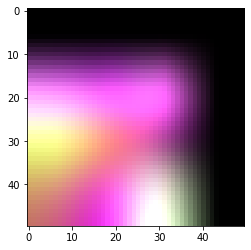

In [ ]:
plt.imshow(img)

In [ ]:
os.system('mkdir -p \"/content/sample_data/treinamento/train/\"')
os.system('mkdir -p \"/content/sample_data/treinamento/train/non-logging-resized\"')

yourpath = "/content/sample_data/treinamento/non-logging-resized"

root1 = "/content/sample_data/treinamento/non-logging-resized"
root2 = "/content/sample_data/treinamento/train/non-logging-resized"

for root1, dirs, files in os.walk(yourpath, topdown=False):
    for name in files:
        print(os.path.join(root1, name))
        if os.path.splitext(os.path.join(root1, name))[1].lower() == ".tiff":
            if os.path.isfile(os.path.splitext(os.path.join(root1, name))[0] + ".jpg"):
                print ("A jpeg file already exists for %s" % name)
            # If a jpeg is *NOT* present, create one from the tiff.
            else:
                outfile = os.path.splitext(os.path.join(root2,name))[0] + ".jpg"
                try:
                    im = Image.open(os.path.join(root1, name))
                    print ("Generating jpeg for %s" % name)
                    im.thumbnail(im.size)
                    im.save(outfile, "JPEG", quality=100)
                except (Exception, e):
                    print (e)

A saída de streaming foi truncada nas últimas 5000 linhas.
/content/sample_data/treinamento/non-logging-resized/_Id_23526 resized.tiff
Generating jpeg for _Id_23526 resized.tiff
/content/sample_data/treinamento/non-logging-resized/_Id_177224 resized.tiff
Generating jpeg for _Id_177224 resized.tiff
/content/sample_data/treinamento/non-logging-resized/_Id_89971 resized.tiff
Generating jpeg for _Id_89971 resized.tiff
/content/sample_data/treinamento/non-logging-resized/_Id_119057 resized.tiff
Generating jpeg for _Id_119057 resized.tiff
/content/sample_data/treinamento/non-logging-resized/_Id_125976 resized.tiff
Generating jpeg for _Id_125976 resized.tiff
/content/sample_data/treinamento/non-logging-resized/_Id_90443 resized.tiff
Generating jpeg for _Id_90443 resized.tiff
/content/sample_data/treinamento/non-logging-resized/_Id_92760 resized.tiff
Generating jpeg for _Id_92760 resized.tiff
/content/sample_data/treinamento/non-logging-resized/_Id_90100 resized.tiff
Generating jpeg for _Id_90

In [ ]:
os.system('mkdir -p \"/content/sample_data/treinamento/train/selective-loggin-resized/\"')

yourpath = "/content/sample_data/treinamento/selective-logging-resized"
root1 = "/content/sample_data/treinamento/selective-logging-resized"
root2 = "/content/sample_data/treinamento/train/selective-loggin-resized"

for root1, dirs, files in os.walk(yourpath, topdown=False):
    for name in files:
        print(os.path.join(root1, name))
        if os.path.splitext(os.path.join(root1, name))[1].lower() == ".tiff":
            if os.path.isfile(os.path.splitext(os.path.join(root1, name))[0] + ".jpg"):
                print ("A jpeg file already exists for %s" % name)
            # If a jpeg is *NOT* present, create one from the tiff.
            else:
                outfile = os.path.splitext(os.path.join(root2,name))[0] + ".jpg"
                try:
                    im = Image.open(os.path.join(root1, name))
                    print ("Generating jpeg for %s" % name)
                    im.thumbnail(im.size)
                    im.save(outfile, "JPEG", quality=100)
                except (Exception, e):
                    print (e)

/content/sample_data/treinamento/selective-logging-resized/extrac_Id_99972 resized.tiff
Generating jpeg for extrac_Id_99972 resized.tiff
/content/sample_data/treinamento/selective-logging-resized/extrac_Id_166263 resized.tiff
Generating jpeg for extrac_Id_166263 resized.tiff
/content/sample_data/treinamento/selective-logging-resized/extrac_Id_88546 resized.tiff
Generating jpeg for extrac_Id_88546 resized.tiff
/content/sample_data/treinamento/selective-logging-resized/extrac_Id_90254 resized.tiff
Generating jpeg for extrac_Id_90254 resized.tiff
/content/sample_data/treinamento/selective-logging-resized/extrac_Id_101248 resized.tiff
Generating jpeg for extrac_Id_101248 resized.tiff
/content/sample_data/treinamento/selective-logging-resized/extrac_Id_89978 resized.tiff
Generating jpeg for extrac_Id_89978 resized.tiff
/content/sample_data/treinamento/selective-logging-resized/extrac_Id_167297 resized.tiff
Generating jpeg for extrac_Id_167297 resized.tiff
/content/sample_data/treinamento/se

In [ ]:
img=cv2.imread('/content/sample_data/treinamento/train/selective-loggin-resized/extrac_Id_100004 resized.jpg')

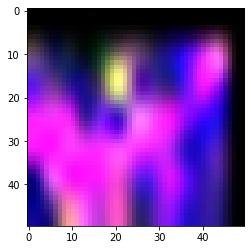

In [ ]:
plt.imshow(img)


In [ ]:
os.system('mkdir -p \"/content/sample_data/train&test\"')
os.system('mkdir -p \"/content/sample_data/train&test/non-logging-resized\"')

input_folder = "/content/sample_data/treinamento/train/"
output_folder = "/content/sample_data/treinamento/train&test" #where you want the split datasets saved. one will be created if none is set

splitfolders.ratio(input_folder, output_folder, seed=42, ratio=(.8, .1, .1)) # ratio of split are in order of train/val/test. You can change to whatever you want. For train/val sets only, you could do .75, .25 for example.

Copying files: 4324 files [00:00, 8783.01 files/s]


In [ ]:
image_size = (50, 50)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/sample_data/treinamento/train&test/train",
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 3459 files belonging to 2 classes.
Using 2768 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/sample_data/treinamento/train&test/val",
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 432 files belonging to 2 classes.
Using 86 files for validation.


In [ ]:

print(val_ds)

class_names = train_ds.class_names
print(class_names)

<BatchDataset shapes: ((None, 50, 50, 3), (None,)), types: (tf.float32, tf.int32)>
['non-logging-resized', 'selective-loggin-resized']


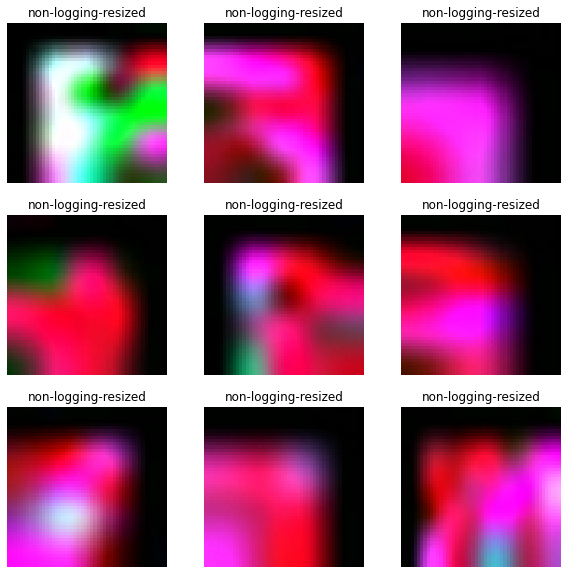

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")



In [ ]:
data_augmentation = keras.Sequential(
    [
     layers.experimental.preprocessing.RandomFlip("horizontal"),
     layers.experimental.preprocessing.RandomRotation(0.05),
     layers.experimental.preprocessing.RandomZoom(0.10)
    ]
)

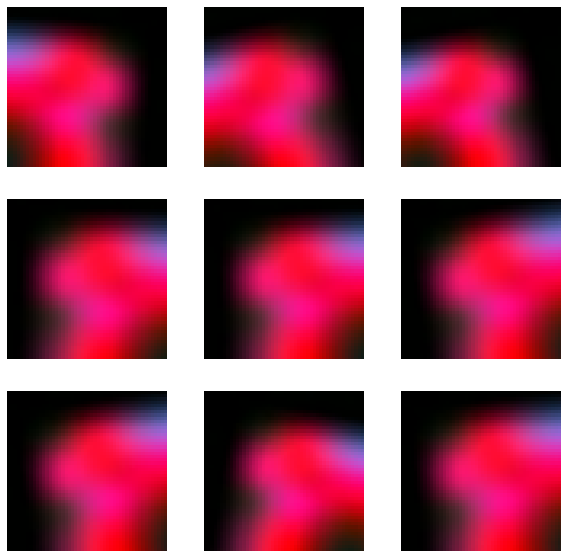

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

# **Funções diversas**

In [ ]:
checkpoint_filepath = '/content/content'

early_stop = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=6,
    verbose=0,
    restore_best_weights = True)

def scheduler(epoch, lr):
  if epoch < 9:
    return lr
  else:
    return lr * tf.math.exp(-0.008)

lr_callback = tf.keras.callbacks.LearningRateScheduler(scheduler)


def use_gpu():  
  device_name = tf.test.gpu_device_name()
  if device_name != '/device:GPU:0':
    print('GPU device not found')
    return False
  print('Found GPU at: {}'.format(device_name))
  return True

**Modelo base**

In [ ]:
keras.backend.clear_session()

def make_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)
    # Image augmentation block
    x = data_augmentation(inputs)

    x = layers.Conv2D(32, kernel_size=(3, 3), activation="relu")(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.Conv2D(64, kernel_size=(3, 3), activation="relu")(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.Flatten()(x)
    x = layers.Dropout(0.5)(x)

    if num_classes == 2:
        activation = "sigmoid"
        units = 1
    else:
        activation = "softmax"
        units = num_classes

    outputs = layers.Dense(units, activation=activation)(x)
    return keras.Model(inputs, outputs)



**Novo modelo**

In [ ]:
def make_model2(input_shape, nl, ks, s, ps, num_classes, drop=0.05):
    inputs = keras.Input(shape=input_shape)
    # Image augmentation block
    x = data_augmentation(inputs)
    x = layers.Conv2D(nl[0], ks[0], strides=(s[0],s[0]), padding='same', activation="relu")(x)
    x = layers.MaxPooling2D(pool_size=(ps[0],ps[0]))(x)
    x = layers.Conv2D(nl[1], ks[1], strides=(s[1],s[1]), padding='same', activation="relu")(x)
    x = layers.MaxPooling2D(pool_size=(ps[1],ps[1]))(x)
    x = layers.Conv2D(nl[2], ks[2], strides=(s[2],s[2]), padding='same', activation="relu")(x)
    x = layers.MaxPooling2D(pool_size=(ps[2],ps[2]))(x)
    # x = layers.Conv2D(nl[3], ks, strides=s, padding='same', activation="relu")(x)
    # x = layers.MaxPooling2D(pool_size=ps)(x)
    # x = layers.Conv2D(nl[4], ks, strides=s, padding='same', activation="relu")(x)
    # x = layers.MaxPooling2D(pool_size=(ps, ps))(x)
    x = layers.Flatten()(x)
    x = layers.Dropout(drop)(x)
    if num_classes == 2:
        activation = "sigmoid"
        units = 1
    else:
        activation = "softmax"
        units = num_classes
    outputs = layers.Dense(units, activation=activation)(x)

    return keras.Model(inputs, outputs)

**Novas Rodadas**

Found GPU at: /device:GPU:0
Epoch 1/100
87/87 [==============================] - 2s 13ms/step - loss: 1.1719 - accuracy: 0.2301 - val_loss: 0.3424 - val_accuracy: 0.3256
Epoch 2/100
87/87 [==============================] - 1s 12ms/step - loss: 0.3166 - accuracy: 0.2301 - val_loss: 0.3496 - val_accuracy: 0.3256
Epoch 3/100
87/87 [==============================] - 1s 11ms/step - loss: 0.2836 - accuracy: 0.2301 - val_loss: 0.2942 - val_accuracy: 0.3256
Epoch 4/100
87/87 [==============================] - 1s 12ms/step - loss: 0.2747 - accuracy: 0.2301 - val_loss: 0.2945 - val_accuracy: 0.3256
Epoch 5/100
87/87 [==============================] - 1s 13ms/step - loss: 0.2580 - accuracy: 0.2301 - val_loss: 0.2182 - val_accuracy: 0.3256
Epoch 6/100
87/87 [==============================] - 1s 11ms/step - loss: 0.2559 - accuracy: 0.2301 - val_loss: 0.3075 - val_accuracy: 0.3256
Epoch 7/100
87/87 [==============================] - 1s 11ms/step - loss: 0.2415 - accuracy: 0.2301 - val_loss: 0.2856 -

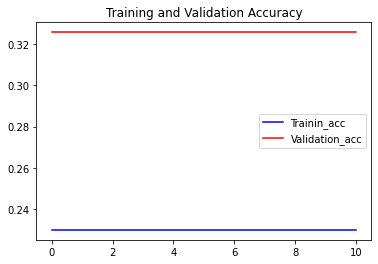

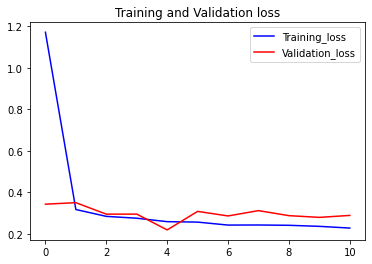

This image most likely belongs to non-logging-resized with a 100.00 percent confidence.
prediction:  non-logging-resized
This image most likely belongs to non-logging-resized with a 100.00 percent confidence.
prediction:  non-logging-resized
This image most likely belongs to non-logging-resized with a 100.00 percent confidence.
prediction:  non-logging-resized


In [ ]:
## use_gpu()
#with tf.device('/device:GPU:0') as gpu:
#  # run code ...
#  print("Gpu name={}".format(gpu))

num_epochs = 100

# Meu
exp = 1
output = ""
# neuronsLayers = [[32, 64, 128, 256, 512], [25, 50, 100, 200, 400]]
neuronsLayers = [[32, 64, 64]]
# kernelSize = [3, 4, 5]
kernelSize = [[3, 3, 3]]
# strides = [1, 2, 3]
strides = [[1, 1, 1]]
# poolSize = [2, 3, 4]
poolSize = [[2, 2, 2]]
#numClasses = [1, 2]
numClasses = [1]

use_gpu()

testDesc = pd.DataFrame(columns=['exp', 'precdiction', 'confidence'])
for ks in kernelSize:
    inputShape = image_size + (ks[0],)
    for s in strides:
        for ps in poolSize:
            for nl in neuronsLayers:
                for nc in numClasses:
                    model = make_model2(inputShape, nl, ks, s, ps, nc)
                    filename = "{:>04d}".format(exp) + "-" + str(nl[0]) + "x" + \
                      str(nl[1]) + "x" + str(nl[2]) + "-Classes-" + str(nc) + "-Poll-" +\
                      str(ps) + "-Stride-" + str(s) + "-Kernel-" + str(ks) + ".png"
                    # filename = "{:>04d}".format(exp) + "-" + str(nl[0]) + "x" + \
                    #            str(nl[1]) + "x" + str(nl[2]) + "x" + str(nl[3]) + \
                    #            "x" + str(nl[4]) + "-Classes-" + str(nc) + "-Poll-" +\
                    #             str(ps) + "-Stride-" + str(s) + "-Kernel-" + str(ks) + ".png"
                    plot_model(model, to_file="sumary" + filename, show_shapes=True, show_layer_names=True)

                    model.compile(optimizer= keras.optimizers.Adam(),
                                  loss = 'BinaryCrossentropy',
                                  metrics = ["accuracy"])
                    with tf.device('/device:GPU:0') as gpu:
                      history = model.fit(train_ds,
                                        epochs = num_epochs,
                                        callbacks = [early_stop, lr_callback],
                                        validation_data = val_ds)

                    acc = history.history['accuracy']
                    val_acc = history.history['val_accuracy']
                    loss = history.history['loss']
                    val_loss = history.history['val_loss']
                    epochs=range(len(acc))
                    plt.close('all')
                    plt.plot(epochs,acc,label='Trainin_acc',color='blue')
                    plt.plot(epochs,val_acc,label='Validation_acc',color='red')
                    plt.legend()
                    plt.title("Training and Validation Accuracy")
                    plt.savefig("validationA-" + filename, dpi=600, format='png')
                    plt.show()
                    plt.close('all')
                    plt.plot(epochs,loss,label='Training_loss',color='blue')
                    plt.plot(epochs,val_loss,label='Validation_loss',color='red')
                    plt.legend()
                    plt.title("Training and Validation loss")
                    plt.savefig("validationL" + filename, dpi=600, format='png')
                    plt.show()

                    image_path = "/content/sample_data/treinamento/train&test/test/selective-loggin-resized/extrac_Id_100019 resized.jpg"
                    image_path2 = "/content/sample_data/treinamento/train&test/test/selective-loggin-resized/extrac_Id_100092 resized.jpg"
                    image_path3 = "/content/sample_data/treinamento/train&test/test/non-logging-resized/_Id_100003 resized.jpg"
                    merged_path = [image_path,image_path2,image_path3]

                    experiment = "exp{:>04d}".format(exp)
                    for img_path in merged_path:
                        img = keras.preprocessing.image.load_img(
                            img_path, target_size=image_size)
                        img_array = keras.preprocessing.image.img_to_array(img)
                        img_array = tf.expand_dims(img_array, 0) # Create a batch

                        predictions = model.predict(img_array)
                        score = tf.nn.softmax(predictions[0])
                        pred_class = np.argmax(predictions)

                        pred_class = class_names[pred_class]
                        print(
                            "This image most likely belongs to {} with a {:.2f} percent confidence."
                            .format(class_names[np.argmax(score)], 100 * np.max(score)))
                        print('prediction: ',pred_class)
                        testDesc.loc[exp] = [experiment, class_names[np.argmax(score)], 100 * np.max(score)]
                    exp += 1
                    testDesc.to_csv("solucao.csv")

**Rodada Base**

In [ ]:
model = make_model(input_shape=image_size + (3,), num_classes=2)

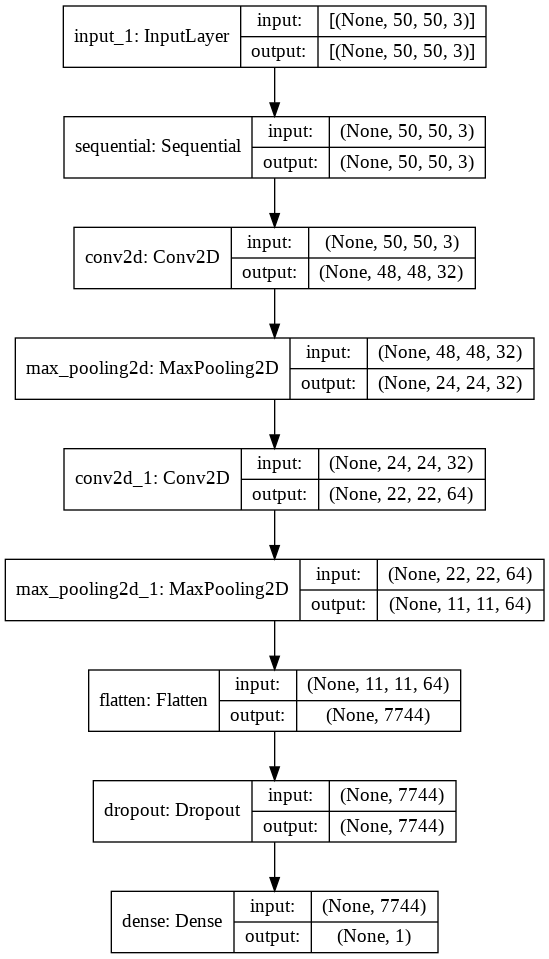

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
epochs = 100

model.compile(optimizer= keras.optimizers.Adam(),
              loss = 'BinaryCrossentropy',
              metrics = ["accuracy"])

history = model.fit(
    train_ds, epochs = epochs, 
    callbacks = [early_stop, lr_callback],
    validation_data = val_ds)

Epoch 1/100
87/87 [==============================] - 12s 127ms/step - loss: 2.5965 - accuracy: 0.7977 - val_loss: 0.3700 - val_accuracy: 0.8605
Epoch 2/100
87/87 [==============================] - 11s 125ms/step - loss: 0.4353 - accuracy: 0.8537 - val_loss: 0.3526 - val_accuracy: 0.8372
Epoch 3/100
87/87 [==============================] - 11s 124ms/step - loss: 0.3715 - accuracy: 0.8671 - val_loss: 0.3660 - val_accuracy: 0.8721
Epoch 4/100
87/87 [==============================] - 11s 124ms/step - loss: 0.3363 - accuracy: 0.8721 - val_loss: 0.2718 - val_accuracy: 0.8953
Epoch 5/100
87/87 [==============================] - 11s 123ms/step - loss: 0.3217 - accuracy: 0.8761 - val_loss: 0.3585 - val_accuracy: 0.8953
Epoch 6/100
87/87 [==============================] - 11s 123ms/step - loss: 0.2978 - accuracy: 0.8783 - val_loss: 0.3726 - val_accuracy: 0.8721
Epoch 7/100
87/87 [==============================] - 11s 123ms/step - loss: 0.2903 - accuracy: 0.8793 - val_loss: 0.3855 - val_accuracy:

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 50, 50, 3)]       0         
_________________________________________________________________
sequential (Sequential)      (None, 50, 50, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 7744)              0     

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs=range(len(acc))

Text(0.5, 1.0, 'Training and Validation Accuracy')

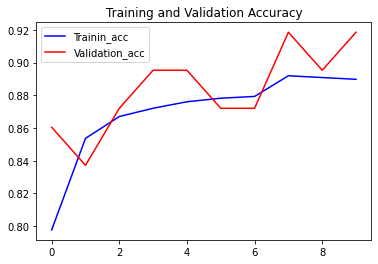

In [ ]:
plt.plot(epochs,acc,label='Trainin_acc',color='blue')
plt.plot(epochs,val_acc,label='Validation_acc',color='red')
plt.legend()
plt.title("Training and Validation Accuracy")

Text(0.5, 1.0, 'Training and Validation loss')

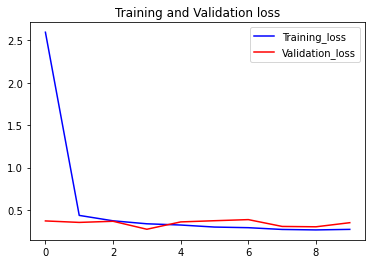

In [ ]:
plt.plot(epochs,loss,label='Training_loss',color='blue')
plt.plot(epochs,val_loss,label='Validation_loss',color='red')
plt.legend()
plt.title("Training and Validation loss")

In [ ]:
image_path = "/content/sample_data/treinamento/train&test/test/selective-loggin-resized/extrac_Id_100019 resized.jpg"
image_path2 = "/content/sample_data/treinamento/train&test/test/selective-loggin-resized/extrac_Id_100092 resized.jpg"
image_path3 = "/content/sample_data/treinamento/train&test/test/non-logging-resized/_Id_100003 resized.jpg"
merged_path = [image_path,image_path2,image_path3]

for img_path in merged_path:
    img = keras.preprocessing.image.load_img(
        img_path, target_size=image_size)
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch
    
    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])
    pred_class = np.argmax(predictions)

    pred_class = class_names[pred_class]

    
    print(
        "This image most likely belongs to {} with a {:.2f} percent confidence."
        .format(class_names[np.argmax(score)], 100 * np.max(score)))
    print('prediction: ',pred_class)

This image most likely belongs to non-logging-resized with a 100.00 percent confidence.
prediction:  non-logging-resized
This image most likely belongs to non-logging-resized with a 100.00 percent confidence.
prediction:  non-logging-resized
This image most likely belongs to non-logging-resized with a 100.00 percent confidence.
prediction:  non-logging-resized
